In [139]:
import pandas as pd
import numpy as np

#References:https://www.datacamp.com/tutorial/fuzzy-string-python
df = pd.read_excel("Master - F.xlsx")
df2 = pd.read_excel("Master-Data Engineering.xlsx")
df = pd.concat([df, df2])
skill_master = []

for data in df['Skills']:
    for dp in data.split(", "):
        skill_master.append(str(dp).strip().lower().replace("]","").replace(",",""))

arr = np.array(skill_master)
print(len(np.unique(arr)))
pd.DataFrame(np.unique(arr), columns= ["List"]).to_excel("Skill List.xlsx")

i=0
for data in df['Skills']:

    for dp in data.split(", "):
        try:
            #df.loc[str(dp).strip().lower().replace("]","").replace(",","")][i] = 1
            df.loc[i,str(dp).strip().lower().replace("]","").replace("[","").replace(",","").replace("'","")] = 1
        except:
            continue
    i += 1

df.to_excel("Master.xlsx",sheet_name="cleaned data")


dp = df.iloc[:,1:]

#dp["Unique"] = df[["Designation", "Company Name", "Location", "Skills"]].apply("-".join, axis=1)

df2 = dp
df2.drop(df2.iloc[:,0:4], inplace=True, axis = 1)
# df2.insert(0,"Unique",df2.pop("Unique"))
def convertor(num):
    if str(num)=='nan':
        num = 0
    return num
        
df2 = df2.applymap(convertor)
df2

911


c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)
c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)
c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  T

,financial planning,profit centre,profitability report,forecasting,general insurance,finance,budgeting,corporate handling,financial reporting,accounting,...,econometrics,shell scripts,jpeg,talent acquisition,dbms,splunk,predictive analytics,problem management,infrastructure services,regression testing
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
import numpy as np
from scipy.sparse import csr_matrix
import sparse_dot_topn.sparse_dot_topn as ct
import re
from sklearn.feature_extraction.text import TfidfVectorizer

col_arr = df2.columns.values
def ngrams(string, n=2):
    string = string.lower()
    chars_to_remove = ['&','{', ",", '.']
    #rx = '[' + re.escape(''.join(chars_to_remove)) + ']'
    string = string.replace("&", "and")
    string = string.replace(",", " ")
    string = string.replace("-"," ")
    string = string.title()
    string = re.sub(" +"," ",string)
    string = " " + string + " "
    ngrams = zip(*[string[i:] for i in range(n)])
    return [''.join(ngram) for ngram in ngrams]


def awesome_cossim_top(A, B, ntop, lower_bound=0):
    # force A and B as a CSR matrix.
    # If they have already been CSR, there is no overhead
    A = A.tocsr()
    B = B.tocsr()
    M, _ = A.shape
    _, N = B.shape

    idx_dtype = np.int32

    nnz_max = M*ntop

    indptr = np.zeros(M+1, dtype=idx_dtype)
    indices = np.zeros(nnz_max, dtype=idx_dtype)
    data = np.zeros(nnz_max, dtype=A.dtype)

    ct.sparse_dot_topn(
        M, N, np.asarray(A.indptr, dtype=idx_dtype),
        np.asarray(A.indices, dtype=idx_dtype),
        A.data,
        np.asarray(B.indptr, dtype=idx_dtype),
        np.asarray(B.indices, dtype=idx_dtype),
        B.data,
        ntop,
        lower_bound,
        indptr, indices, data)

    return csr_matrix((data,indices,indptr),shape=(M,N))

def get_matches_df(sparse_matrix, name_vector, top=10000):
    non_zeros = sparse_matrix.nonzero()
    
    sparserows = non_zeros[0]
    sparsecols = non_zeros[1]
    
    if top:
        nr_matches = top
    else:
        nr_matches = sparsecols.size
    
    left_side = np.empty([nr_matches], dtype=object)
    right_side = np.empty([nr_matches], dtype=object)
    similairity = np.zeros(nr_matches)
    
    for index in range(0, nr_matches):
        left_side[index] = name_vector[sparserows[index]]
        right_side[index] = name_vector[sparsecols[index]]
        similairity[index] = sparse_matrix.data[index]
    
    return pd.DataFrame({'left_side': left_side,
                'right_side': right_side,
                        'similairity': similairity})

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

#Under standing: zip(*[string[i:] for i in range(n)])
string = "Tangri Ansh"
arr = []
ngrams = zip(*[string[i:] for i in range(3)])
for j in range(3):
    arr.append(string[j:])
print("arr:",arr)
print("*arr",*arr)
print("*arr[0]", *arr[0])
print("*arr[1]", *arr[1])
print("*arr[2]", *arr[2])
for i in zip(*arr):
    print(i)


#Understanding the working of TF-IDF on the 2 grams:
col_arr = df2.columns.values
def ngrams(string, n=2):
    string = string.lower()
    chars_to_remove = ['&','{', ",", '.']
    #rx = '[' + re.escape(''.join(chars_to_remove)) + ']'
    string = string.replace("&", "and")
    string = string.replace(",", " ")
    string = string.replace("-"," ")
    string = string.title()
    string = re.sub(" +"," ",string)
    string = " " + string + " "
    ngrams = zip(*[string[i:] for i in range(n)])
    return [''.join(ngram) for ngram in ngrams]

company_names = df2.columns
vectorizer = TfidfVectorizer(min_df=2, analyzer=ngrams)
a = vectorizer.fit_transform(company_names)
vectorizer.get_feature_names_out()
print(a.toarray()[0].shape)
print(a.toarray().shape)
print(a.toarray())

val1 = df2.columns.get_loc('development management')
val2 = df2.columns.get_loc('development manager')
from sklearn.metrics.pairwise import cosine_similarity as cs
cs(a[val1], a[val2])


arr: ['Tangri Ansh', 'angri Ansh', 'ngri Ansh']
*arr Tangri Ansh angri Ansh ngri Ansh
*arr[0] T a n g r i   A n s h
*arr[1] a n g r i   A n s h
*arr[2] n g r i   A n s h
('T', 'a', 'n')
('a', 'n', 'g')
('n', 'g', 'r')
('g', 'r', 'i')
('r', 'i', ' ')
('i', ' ', 'A')
(' ', 'A', 'n')
('A', 'n', 's')
('n', 's', 'h')
(423,)
(783, 423)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.23106156 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


array([[0.89648661]])

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer

company_names = df2.columns
vectorizer = TfidfVectorizer(min_df=2, analyzer=ngrams)
tf_idf_matrix = vectorizer.fit_transform(company_names)

print(tf_idf_matrix.toarray().shape, vectorizer.get_feature_names_out().shape)

#np.where(tf_idf_matrix.toarray()[100]>0)
print(company_names[100])
vectorizer.get_feature_names_out()[30]
matches = awesome_cossim_top(tf_idf_matrix, tf_idf_matrix.transpose(), 400, 0.8)
matches_df = get_matches_df(matches, company_names, top=1000)
matches_df = matches_df[matches_df['similairity'] < 0.99999] # Remove all exact matches
#matches_df.to_excel("dupli.xlsx")
matches_df

(783, 423) (423,)
consulting


,left_side,right_side,similairity
1,financial planning,financial planing,0.950584
2,financial planning,financial planning financial analysis,0.883234
3,financial planning,finance planning,0.863499
4,financial planning,financial planning analysis,0.856892
8,forecasting,forecasts,0.822467
...,...,...,...
985,performance,performance tuning,0.867938
986,performance,performance management,0.814138
994,development manager,development management,0.896487
995,development manager,development,0.820382


In [180]:
df3 = df2.drop(['financial planning financial analysis', 'fp and a'], axis = 1)
df_ = df2
# for data in matches_df.right_side:
#     try:
#         df_ = df_.drop([data], axis=1)
#     except:
#         continue
df_ = df_.drop(np.array(matches_df.left_side), axis=1)
#df_ = df_.drop(['Location', 'Skills', 'Company Name', 'Designation'], axis=1)#df_.drop(['balance sheet reconciliations'], axis=1)

arr_ = []
for data in df_.columns:
    if df_[f'{data}'].value_counts()[1]<2:
        arr_.append(data)
df_ = df_.drop(arr_, axis=1)
df_

,profit centre,profitability report,general insurance,finance,corporate handling,mis,analytical,competitor analysis,research,advanced excel,...,data validation,compliance,digital media,adobe analytics,google analytics,pdf,sms,genetics,software design,infrastructure services
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


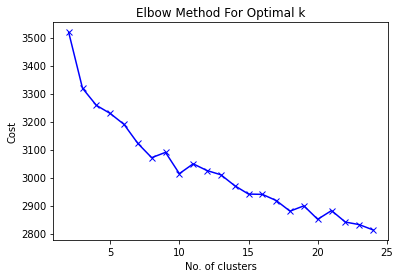

In [181]:
import matplotlib.pyplot as plt
cost = []
from kmodes.kmodes import KModes
range_low = 2
range_high = 25
for cluster in range(range_low, range_high):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kmodes.fit_predict(df_)
        cost.append(kmodes.cost_)
        #print(kmodes.cost_)
    except:
        break
pd.DataFrame(data = {'Range':[i for i in range(range_low, range_high)],'Cost':cost }).to_excel("cost.xlsx")
K = range(range_low, range_high)
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

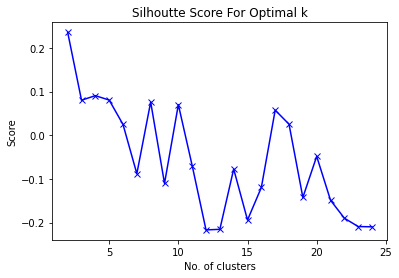

In [182]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from kmodes.kmodes import KModes
from kmodes import kprototypes
import pandas as pd
import numpy as np

def create_dm(dataset):
    #if the input dataset is a dataframe, we take out the values as a numpy. 
    #If the input dataset is a numpy array, we use it as is.
    if type(dataset).__name__=='DataFrame':
        dataset=dataset.values    
    lenDataset=len(dataset)
    distance_matrix=np.zeros(lenDataset*lenDataset).reshape(lenDataset,lenDataset)
    for i in range(lenDataset):
        for j in range(lenDataset):
            x1= dataset[i].reshape(1,-1)
            x2= dataset[j].reshape(1,-1)
            distance=kprototypes.matching_dissim(x1, x2)
            distance_matrix[i][j]=distance
            distance_matrix[j][i]=distance
    return distance_matrix
data=df_
#import Exception
cost__ = []
score__ = []
range_low = 2
range_high = 25
distance_matrix=create_dm(data)
for cluster in range(range_low ,range_high):
    try:
        untrained_model=KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        trained_model=untrained_model.fit(data)
        cluster_labels = trained_model.labels_
        score=silhouette_score(distance_matrix, cluster_labels,metric="precomputed")
        #silhouette_scores[k]=score
        cost__.append(trained_model.cost_)
        score__.append(score)
    except Exception as e:
        print(f"Hey, in break: Error : \n\n {e}")
        break
#df_cost = pd.DataFrame({'Cluster': range(1, 4), 'Cost': cost})
pd.DataFrame(data = {'Range':[i for i in range(range_low, range_high)],'Score':score__, 'Cost':cost__ }).to_excel("Optimal N.xlsx")

K = range(range_low, range_high)
plt.plot(K, score__, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Score')
plt.title('Silhoutte Score For Optimal k')
plt.show()

In [187]:
#n_clusters = 11 #
#Data labellar and cluster details

from kmodes.kmodes import KModes
cluster_n = 8
count = {}
for i in range(0,cluster_n):
    count[i] = 0

kmodes = KModes(n_jobs = -1, n_clusters = cluster_n, init = 'Huang')#random state = 0
kmodes.fit_predict(df_)==kmodes.labels_
unique = np.unique(kmodes.labels_)
for data in kmodes.labels_:
    count[np.where(unique==data)[0][0]] += 1
print(count)

for cluster_num in range(0,cluster_n):
    num = 1
    if(cluster_num)>0:
        print("\n")
    print(f"This is cluster {cluster_num} with count {count[cluster_num]}:")
    for i in np.where(np.array(kmodes.cluster_centroids_[cluster_num])==1)[0]:
        print(f"Skill {num}: {df_.columns[i]}")
        num += 1
#print(kmodes.cluster_centroids_[5])

{0: 66, 1: 48, 2: 152, 3: 158, 4: 87, 5: 36, 6: 232, 7: 54}
This is cluster 0 with count 66:
Skill 1: fpa
Skill 2: variance analysis


This is cluster 1 with count 48:
Skill 1: record to report


This is cluster 2 with count 152:
Skill 1: variance analysis


This is cluster 3 with count 158:
Skill 1: sql
Skill 2: python


This is cluster 4 with count 87:
Skill 1: python


This is cluster 5 with count 36:
Skill 1: finance


This is cluster 6 with count 232:


This is cluster 7 with count 54:
Skill 1: analytical


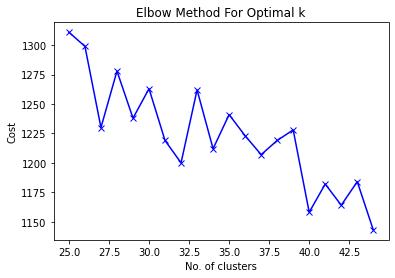

In [60]:
import matplotlib.pyplot as plt
cost = []
from kmodes.kmodes import KModes
for cluster in range(25,45):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kmodes.fit_predict(df2)
        cost.append(kmodes.cost_)
    except:
        break
df_cost = pd.DataFrame({'Cluster': range(25, 45), 'Cost': cost})

df_cost
K = range(25,45)
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [277]:
i=0
for data in df['Skills']:
    for dp in data.split(", "):
        try:
            df[str(dp).strip().lower().replace("]","").replace(",","")][i] = 1
        except:
            continue
    i += 1

#df.to_excel("Master.xlsx",sheet_name="cleaned data")

dp = df.iloc[:,1:]
dp["Unique"] = df[["Designation", "Company Name", "Location", "Skills"]].apply("-".join, axis=1)
df2 = dp
df2.drop(df2.iloc[:,0:4], inplace=True, axis = 1)
df2.insert(0,"Unique",df2.pop("Unique"))
def convertor(num):
    if str(num)=='nan':
        num = 0
    return num
        
df2 = df2.applymap(convertor)
df2

C:\Users\ansht\AppData\Local\Temp/ipykernel_5324/1766578064.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(dp).strip().lower().replace("]","").replace(",","")][i] = 1


,Unique,abap,accessories,account management,account reconciliation,account reconciliations,accounting,accounting operations,accounting reporting,accounting standards,...,us healthcare,us payroll,usage,variance analysis,vba,vistex,vlookup,voucher entry,wealth management,wip
0,Manager - Financial Planning & Analysis (Gener...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Manager - Financial Planning and Analysis-Movi...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Financial Planning and Analysis Manager-Health...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Deputy National Lead - Financial Planning & An...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Manager Financial Planning and Analysis-captai...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,FINANCIAL PLAN & ANALYSIS NEW ASSOCIATE-RECORD...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,Senior Manager- Business Planning and Financia...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249,Financial Planning & Analysis (FP&A) Manager-M...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250,"Senior Analyst, Administration and Planning-BN...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [290]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df2.iloc[:,1:], min_support=0.05, use_colnames=True, verbose=1)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(["support"], axis = 0, ascending= False)
rules.to_excel("Apriori.xlsx")

Processing 18 combinations | Sampling itemset size 64


In [460]:
#Skills that always occur together
unique = []

for i in range(0,len(rules)):
    unique.append(str(rules.iloc[i,4])+"*"+str(round(rules.iloc[i,6],8)))
rules['unique'] = unique

rules_ = rules.drop_duplicates(subset=['unique'])

In [470]:
#Values that always occur together
rules_.sort_values(by=['support'], ascending=False)[rules_['confidence']==1]

C:\Users\ansht\AppData\Local\Temp/ipykernel_5324/2656649469.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rules_.sort_values(by=['support'], ascending=False)[rules_['confidence']==1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,unique
467,"(variance analysis, financial reporting, budge...",(forecasting),0.063492,0.515873,0.063492,1.0,1.938462,0.030738,inf,0.06349206349206349*1.93846154
97,"(balance sheet, journal entries)",(record to report),0.059524,0.095238,0.059524,1.0,10.500000,0.053855,inf,0.05952380952380952*10.5
174,"(operations, budgeting)",(forecasting),0.055556,0.515873,0.055556,1.0,1.938462,0.026896,inf,0.05555555555555555*1.93846154
732,"(forecasting, financial reporting, financial p...",(financial analysis),0.051587,0.412698,0.051587,1.0,2.423077,0.030297,inf,0.051587301587301584*2.42307692
84,"(balance sheet, operations)",(forecasting),0.051587,0.515873,0.051587,1.0,1.938462,0.024975,inf,0.051587301587301584*1.93846154


In [475]:
rules_[(rules_['support']>0.1)&(rules_['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,unique
4,(financial planning),(analytical),0.658730,0.134921,0.103175,0.156627,1.160879,0.014298,1.025737,0.10317460317460317*1.16087881
18,(budgeting),(financial analysis),0.527778,0.412698,0.253968,0.481203,1.165992,0.036155,1.132045,0.25396825396825395*1.1659919
20,(financial planning),(budgeting),0.658730,0.527778,0.373016,0.566265,1.072923,0.025353,1.088735,0.373015873015873*1.07292327
24,(budgeting),(forecasting),0.527778,0.515873,0.412698,0.781955,1.515789,0.140432,2.220307,0.4126984126984127*1.51578947
26,(budgeting),(fpa),0.527778,0.142857,0.103175,0.195489,1.368421,0.027778,1.065421,0.10317460317460317*1.36842105
...,...,...,...,...,...,...,...,...,...,...
682,"(budgeting, variance analysis, financial analy...","(financial planning, forecasting)",0.142857,0.349206,0.119048,0.833333,2.386364,0.069161,3.904762,0.11904761904761904*2.38636364
683,"(budgeting, financial planning, forecasting)","(variance analysis, financial analysis)",0.297619,0.190476,0.119048,0.400000,2.100000,0.062358,1.349206,0.11904761904761904*2.1
684,"(financial planning, forecasting, financial an...","(budgeting, variance analysis)",0.214286,0.297619,0.119048,0.555556,1.866667,0.055272,1.580357,0.11904761904761904*1.86666667
685,"(budgeting, forecasting, financial analysis)","(financial planning, variance analysis)",0.210317,0.289683,0.119048,0.566038,1.953993,0.058122,1.636818,0.11904761904761904*1.95399328


In [2]:
from thefuzz import fuzz
# Check the similarity score
name = "Ekta" #Ekta
full_name = "Ekta Mayur Vihar"#Ekta Aon

print(f"Similarity score: {fuzz.token_set_ratio(name, full_name)}")

Similarity score: 100
